In [227]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [228]:
import math

In [229]:
%run data.ipynb
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [4]:
df1 = load_uc2(1, intact=True)
df2 = load_uc2(2, intact=True)
df7 = load_uc2(7, intact=True)
df8 = load_uc2(8, intact=True)

In [5]:

df13 = pd.read_excel('/Users/bryan/Documents/ChenLab/10Jun2021/degraded/DrChen_tRNA_A_Gln_FA_13.xlsx')
df13 = thermo_df(df13)

# df13 = load_uc2(13)
df14 = load_uc2(14)

df19 = pd.read_excel('/Users/bryan/Downloads/drive-download-20210809T144630Z-001/DrChen_tRNA_B_Gln_FA_19_Batch2.xlsx')
df19 = thermo_df(df19)
# df19 = load_uc2(19)
df20 = pd.read_excel('/Users/bryan/Downloads/drive-download-20210809T144630Z-001/DrChen_tRNA_B_Gln_A_FA_20_Batch2.xlsx')
df20 = thermo_df(df20)
# df20 = load_uc2(20)
df13.shape, df14.shape, df19.shape, df20.shape

((2828, 5), (4673, 5), (4025, 5), (5887, 5))

In [6]:
path = "/Users/bryan/Documents/ChenLab/DataYue/"
"""
A_Gln:
DrChen_tRNA_A_Gln.xlsx			DrChen_tRNA_A_Gln_FA.xlsx
DrChen_tRNA_A_Gln_A.xlsx		DrChen_tRNA_A_Gln_FA_13_Batch2.xlsx
DrChen_tRNA_A_Gln_A_FA.xlsx

B_Gln:
7_B_Gln.xlsx				DrChen_tRNA_B_Gln_A_FA_20_Batch2.xlsx
8_B_Gln_A.xlsx				DrChen_tRNA_B_Gln_FA.xlsx
B_Gln_Summary.docx			DrChen_tRNA_B_Gln_FA_19_Batch2.xlsx
DrChen_tRNA_B_Gln_A_FA.xlsx
"""
df1 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'A_Gln', 'DrChen_tRNA_A_Gln'))
df2 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'A_Gln', 'DrChen_tRNA_A_Gln_A'))
df13 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'A_Gln', 'DrChen_tRNA_A_Gln_FA'))
df13_2 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'A_Gln', 'DrChen_tRNA_A_Gln_FA_13_Batch2'))
df14 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'A_Gln', 'DrChen_tRNA_A_Gln_A_FA'))

df7 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'B_Gln', '7_B_Gln'))
df8 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'B_Gln', '8_B_Gln_A'))
df19 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'B_Gln', 'DrChen_tRNA_B_Gln_FA'))
df19_2 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'B_Gln', 'DrChen_tRNA_B_Gln_FA_19_Batch2'))
df20 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'B_Gln', 'DrChen_tRNA_B_Gln_A_FA'))
df20_2 = pd.read_excel('{}/{}/{}.xlsx'.format(path,'B_Gln', 'DrChen_tRNA_B_Gln_A_FA_20_Batch2'))

df1 = thermo_df(df1)
df2 = thermo_df(df2)
df13 = thermo_df(df13)
df13_2 = thermo_df(df13_2)
df14 = thermo_df(df14)

df7 = thermo_df(df7)
df8 = thermo_df(df8)
df19 = thermo_df(df19)
df19_2 = thermo_df(df19_2)
df20 = thermo_df(df20)
df20_2 = thermo_df(df20_2)

In [7]:
df_merge_intact = pd.concat([df1, df7]).drop_duplicates(subset=['Mass']).reset_index()
df_merge_intact_alkb = pd.concat([df2, df8]).drop_duplicates(subset=['Mass'])
# df_merge_intact.tail(), df_merge_intact_alkb.tail()
df_merge_intact = df_merge_intact.reset_index(drop=True)
df_merge_intact_alkb = df_merge_intact_alkb.reset_index(drop=True)

In [224]:
df_masses = pd.read_excel('~/Downloads/glu_isoforms.xlsx', 'Wild')
dfm = match_dfs(df_masses, df13_2)
# df_masses = pd.read_excel('~/Downloads/glu_isoforms.xlsx', 'AlkB')
# dfm = match_dfs(df_masses, df8)
plotly_zone(dfm, y='Vol')
dfm['Ratio'] = dfm.Vol/dfm.Vol.sum()
dfm.sort_values('Vol', ascending=False)

,Mass,RT,Vol,RA,FA,Ratio
304,24159.222060,19.909712,638306.39,0.070253,0.010867,0.657233
407,24160.212558,19.799447,275692.01,0.030343,0.004693,0.283867
684,24190.203772,19.875539,41047.10,0.004518,0.000699,0.042264
1029,24189.201318,19.949334,13846.46,0.001524,0.000236,0.014257
2140,24174.118515,19.799447,2310.16,0.000254,0.000039,0.002379


In [225]:
# df_wild = dfm.copy()
# df_alkb = dfm.copy()
# df_noad = dfm.copy()
# df_ad = dfm.copy()
# dfa = dfm.copy()
dfb = dfm.copy()
# dfc = dfm.copy()
# dfd = dfm.copy()

# dfx = dfm.copy()
# dfy = dfm.copy()

# df_noad.sort_values('Ratio', ascending=False), df_ad.sort_values('Ratio', ascending=False)
# df_wild.sort_values('Ratio', ascending=False), df_alkb.sort_values('Ratio', ascending=False)
print('DrChen_tRNA_A_Gln\n', df_wild.sort_values('Ratio', ascending=False), 
      '\n7_B_Gln\n', df_alkb.sort_values('Ratio', ascending=False))

print('\n\n\n')
print('DrChen_tRNA_A_Gln_FA\n', dfa.sort_values('Ratio', ascending=False), 
      '\nDrChen_tRNA_A_Gln_FA_13_Batch2 \n', dfb.sort_values('Ratio', ascending=False),
     '\nDrChen_tRNA_B_Gln_FA\n', dfc.sort_values('Ratio', ascending=False),
     '\nDrChen_tRNA_B_Gln_FA_19_Batch2\n', dfd.sort_values('Ratio', ascending=False),
     )

DrChen_tRNA_A_Gln
             Mass        RT       Vol        RA        FA     Ratio
87  24159.265575  3.637315  43612.84  0.022659  0.002868  0.797364
86  24160.309218  3.559469   5134.02  0.002667  0.000338  0.093864
83  24189.305013  3.680170   3650.76  0.001897  0.000240  0.066746
82  24190.289146  3.599882   2298.65  0.001194  0.000151  0.042026 
7_B_Gln
               Mass        RT       Vol        RA        FA     Ratio
754   24159.290706  3.599543  46252.89  0.017957  0.002592  0.766844
1204  24160.316924  3.702985   7827.38  0.003039  0.000439  0.129773
1379  24189.262669  3.599543   2935.44  0.001140  0.000164  0.048668
1413  24175.249037  3.702985   2132.95  0.000828  0.000120  0.035363
1438  24174.280034  3.754395   1167.25  0.000453  0.000065  0.019352




DrChen_tRNA_A_Gln_FA
              Mass         RT        Vol        RA        FA     Ratio
506  24160.224831  19.890623  131331.59  0.008490  0.001394  0.540548
581  24175.238396  19.890623   61383.31  0.003968  0.000

In [226]:
dfab = pd.concat([dfa, dfb])
dfab = dfab.sort_values('Mass')
dfab['MassRound'] = np.round(dfab.Mass, 0)
df_mean = dfab.groupby('MassRound').mean()
print(dfab, '\n', df_mean)
# df_mean = df_mean[0]
# plotly_zone(df_mean)

              Mass         RT        Vol        RA        FA     Ratio  \
965   24159.207838  19.772642   12223.67  0.000790  0.000130  0.050311   
304   24159.222060  19.909712  638306.39  0.070253  0.010867  0.657233   
407   24160.212558  19.799447  275692.01  0.030343  0.004693  0.283867   
506   24160.224831  19.890623  131331.59  0.008490  0.001394  0.540548   
2140  24174.118515  19.799447    2310.16  0.000254  0.000039  0.002379   
647   24174.255624  19.983248   38021.66  0.002458  0.000404  0.156493   
581   24175.238396  19.890623   61383.31  0.003968  0.000652  0.252648   
1029  24189.201318  19.949334   13846.46  0.001524  0.000236  0.014257   
684   24190.203772  19.875539   41047.10  0.004518  0.000699  0.042264   

      MassRound  
965     24159.0  
304     24159.0  
407     24160.0  
506     24160.0  
2140    24174.0  
647     24174.0  
581     24175.0  
1029    24189.0  
684     24190.0   
                    Mass         RT        Vol        RA        FA     Ratio
M

In [200]:
df_sample = df13_2
# df_sample[df_sample.Mass>24000].Vol.sum()
df_sample.Vol.sum()/1E6

5873.997545450002

In [212]:

dfa = df_wild.copy()
vol = max(dfa.Vol.max(), dfb.Vol.max())
dfa['Vol'] = dfa.Vol/vol #dfa.Vol.max()
dfb = df_alkb.copy()
dfb['Vol'] = dfb.Vol/vol #dfb.Vol.max()
# plotly_zones(dfa, dfb, y='Vol')
plotly_zone(df_mean, y='Vol')

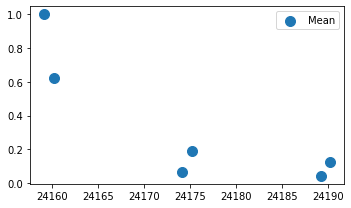

In [210]:
from numpy import log
fig = plt.figure(figsize=(5, 3))
# vol1 = dfa.Vol.max()
# vol2 = dfb.Vol.max()
# vol = max(vol1, vol2)
# plt.scatter(dfa.Mass, dfa.Vol/vol, s=100, color='b', label='Wild-type') ##bdc1c1
# plt.scatter(dfb.Mass, dfb.Vol/vol, s=100, color='r', label='AlkB') ##d9d9d9
plt.scatter(df_mean.Mass, df_mean.Vol/df_mean.Vol.max(), s=100, label='Mean')
plt.legend()

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/gln_intact_masses.svg', transparent=True, dpi=300)

0 (41, 6)
1 (42, 6)
2 (43, 6)
3 (40, 6)
4 (51, 7)
5 (55, 7)
6 (48, 7)
7 (29, 7)
(310, 9)


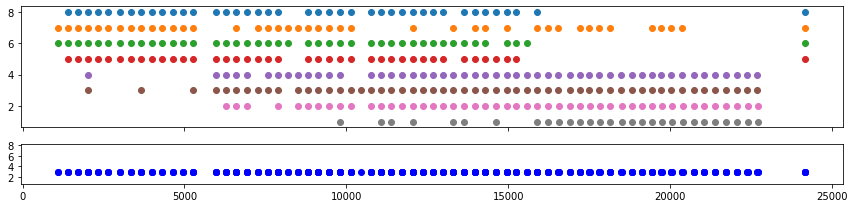

In [230]:
# Gln None AlkB

df_5p_190 = pd.read_excel('~/Downloads/Wild/dfm_merge_24190_5p.xlsx')
df_5p_160 = pd.read_excel('~/Downloads/Wild/dfm_merge_24160_5p.xlsx')
df_5p_189 = pd.read_excel('~/Downloads/Wild/dfm_merge_24189_5p.xlsx')
df_5p_174 = pd.read_excel('~/Downloads/Wild/dfm_merge_24174_5p.xlsx')

df_5p_159 = pd.read_excel('~/Downloads/Wild/dfm_merge_24159_5p.xlsx')
df_5p_175 = pd.read_excel('~/Downloads/Wild/dfm_merge_24175_5p.xlsx')

df_3p_190_rev = pd.read_excel('~/Downloads/Wild/dfm_merge_24190_3p_rev.xlsx')
df_3p_160_rev = pd.read_excel('~/Downloads/Wild/dfm_merge_24160_3p_rev.xlsx')
df_3p_189_rev = pd.read_excel('~/Downloads/Wild/dfm_merge_24189_3p_rev.xlsx')
df_3p_174_rev = pd.read_excel('~/Downloads/Wild/dfm_merge_24174_3p_rev.xlsx')

df_3p_159_rev = pd.read_excel('~/Downloads/Wild/dfm_merge_24159_3p_rev.xlsx')
df_3p_175_rev = pd.read_excel('~/Downloads/Wild/dfm_merge_24175_3p_rev.xlsx')

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 3), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

dfs = [#(df_5p_190, "24190 5'"), 
       (df_5p_160, "24160 5'"), 
#        (df_5p_189, "24189 5'"), 
       (df_5p_159, "24159 5'"),
       (df_5p_174, "24174 5'"), 
       (df_5p_175, "24174 5'"), 
       
#        (df_3p_190_rev, "24190 3' --> 5'"),
       (df_3p_160_rev, "24160 3' --> 5'"),
       (df_3p_159_rev, "24159 3' --> 5'"),
#        (df_3p_189_rev, "24189 3' --> 5'"),
       (df_3p_174_rev, "24174 3' --> 5'"),
       (df_3p_175_rev, "24175 3' --> 5'"),
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/Wild/tRNA_gln_complement.svg', transparent=True, dpi=300)

0 (51, 6)
1 (27, 6)
2 (47, 6)
3 (54, 6)
4 (50, 6)
5 (26, 6)
6 (59, 7)
7 (58, 7)
8 (56, 7)
9 (54, 7)
10 (46, 7)
11 (47, 7)
(477, 9)


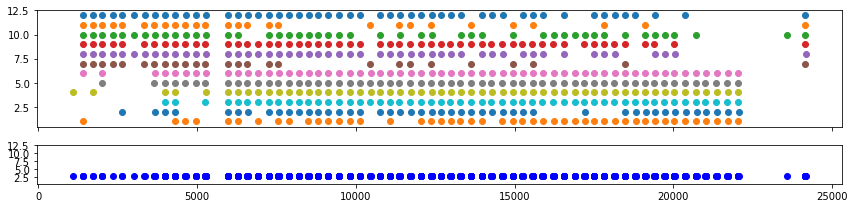

In [202]:
# Gln AlkB

df_5p_146 = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24146_5p.xlsx')
df_5p_132 = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24132_5p.xlsx')
df_5p_145 = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24145_5p.xlsx')
df_5p_131 = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24131_5p.xlsx')
df_5p_160 = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24160_5p.xlsx')
df_5p_147 = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24147_5p.xlsx')

df_3p_146_rev = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24146_3p_rev.xlsx')
df_3p_132_rev = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24132_3p_rev.xlsx')
df_3p_145_rev = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24145_3p_rev.xlsx')
df_3p_131_rev = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24131_3p_rev.xlsx')
df_3p_160_rev = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24160_3p_rev.xlsx')
df_3p_147_rev = pd.read_excel('~/Downloads/GlnAlkB/dfm_merge_24147_3p_rev.xlsx')

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 3), 
                               sharex=True, sharey=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

dfs = [ 
       (df_5p_146, "24146 5'"), 
       (df_5p_132, "24132 5'"), 
       (df_5p_145, "24145 5'"), 
       (df_5p_131, "24131 5'"), 
       (df_5p_160, "24160 5'"), 
       (df_5p_147, "24147 5'"), 
       
       (df_3p_146_rev, "24146 3' --> 5'"),
      (df_3p_132_rev, "24132 3' --> 5'"),
       (df_3p_145_rev, "24145 3' --> 5'"),
      (df_3p_131_rev, "24131 3' --> 5'"),
       (df_3p_160_rev, "24160 3' --> 5'"),
      (df_3p_147_rev, "24147 3' --> 5'"),
      ] 

total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
    print(idx, df_iso.shape)
    if 'Position' in df_iso.columns:
        df_iso['pos'] = df_iso.Position
    else:
        df_iso['pos'] = df_iso.Mass/320
        df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
# plt.legend(loc=3)

df_merge_5p = pd.concat(df_isoforms).drop_duplicates(subset=['Mass', 'RT'])
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')

# df_merge_5p = pd.concat(df_isoforms)
# output(df_merge_5p, plt, fig, 1, 'phe_complement_5p3p')

fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/GlnAlkB/tRNA_gln_complement.svg', transparent=True, dpi=300)

In [204]:
df_5p_146.Mass.min()

1400.12285140804